In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/daily-min-temperatures.xls',header=0 ,parse_dates=[0])

In [ ]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
df['t'] = df['Temp'].shift(1)

In [ ]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [ ]:
train, test = df[1:len(df)-7], df[len(df)-7:]

In [ ]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [ ]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

In [ ]:
prediction = test_X.copy()

In [ ]:
print(prediction)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

3.4228571428571413

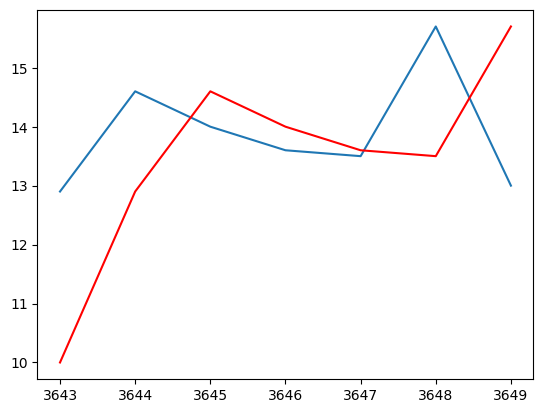

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')
pyplot.show()

auto regression

In [ ]:
import pandas as dp
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/daily-min-temperatures.xls',parse_dates=['Date'], index_col=['Date'])

In [ ]:
X = df.values
print('Shape of data \t',df.shape)
print('original Dataset: \n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data 	 (3650, 1)
original Dataset: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperatures:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

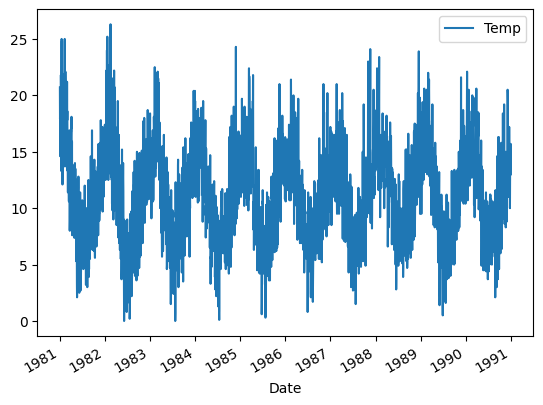

In [ ]:
df.plot()

<Axes: xlabel='Date'>

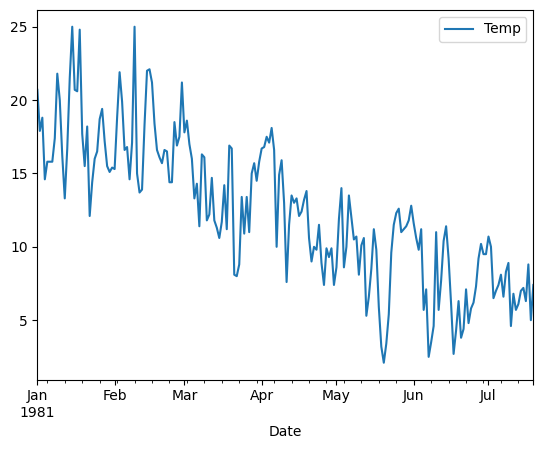

In [ ]:
df[:200].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Temp'], autolag='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and critical values calculation : ", dftest[3])
print("5. Critical Values :",)
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.4448049246117
2. P-Value :  0.0002470826300360994
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and critical values calculation :  3629
5. Critical Values :
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


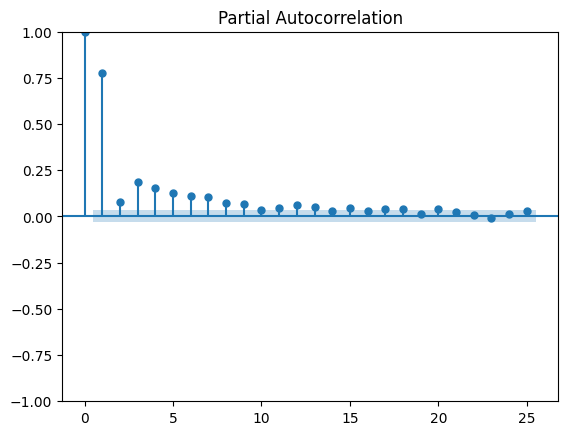

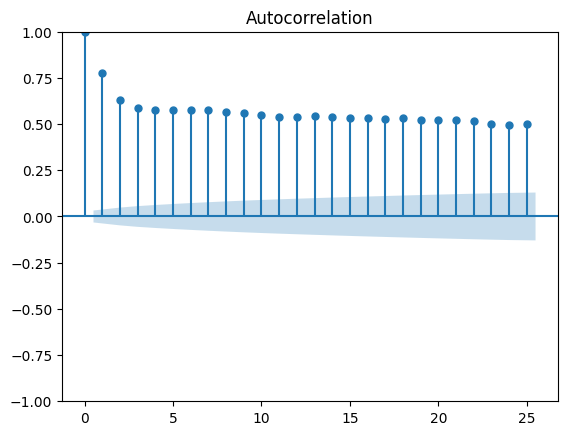

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(df['Temp'],lags=25)
acf=plot_acf(df['Temp'],lags=25)
plt.show()

In [ ]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [ ]:
model=AutoReg(train,lags=10)

In [ ]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sun, 30 Mar 2025   AIC                          16775.028
Time:                        09:45:45   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
print(len(train))

3643


In [ ]:
print(len(test))

7


In [ ]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [ ]:
model_fit.resid

array([-1.6775517 , -2.64717494,  2.14661169, ...,  0.13831396,
        0.47406737, -3.84682856])

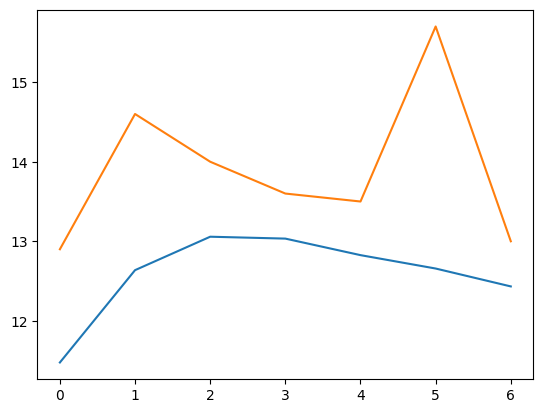

In [ ]:
plt.plot(pred)
plt.plot(test)
plt.show()